<a href="https://colab.research.google.com/github/seoboran/s_edu/blob/master/0818_iris_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 개요 
 iris 붓꽃 분류 모형을 만든다.

### (1) 패키지 불러오기 
 sklearn 패키지를 불러온다


In [2]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


### (2) 데이터 불러오기 
 sklearn 패키지 내장 데이터 있음

In [51]:
from sklearn.datasets import load_iris 

iris=load_iris() # bunch 형태의 데이터셋으로 구성되어 있음 

# 독립변수 구성된 데이터 독립변수: 직접 변경하는 변수
iris_data=iris.data
# 종속변수: 독립변수에 따라 달라지는 변수 
iris_label = iris.target

print('iris target값:', iris_label[[0, 50, 100]])
print('iris target명:', iris.target_names)

iris target값: [0 1 2]
iris target명: ['setosa' 'versicolor' 'virginica']


### (2) 데이터 전처리
-상황: numpy형태, 리스트 
-방법: pandas를 활용해서, 데이터 프레임 만들기
-ref. How to convert a Scikit-learn dataset to a Pandas dataset?[https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878]

In [8]:
import pandas as pd

In [53]:
from sklearn import datasets
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## (4)데이터 시각화 
-시각화를 위한 전처리 

In [56]:
temp_data=df_iris.copy()
#print(temp_data.info())

#column명 바꾸기 
temp_data.columns=["sepal_length" ,"sepal_width", "petal_length" ,"petal_width","species"]
#temp_data.info()

#map
# 0->'setosa',1->'versicolor',2->'virginica'
replace_fct={0:'setaosa',1:'versicolor',2:'virginica'}
temp_data['species']=temp_data['species'].map(replace_fct)
print(temp_data.head(3))

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2  setaosa
1           4.9          3.0           1.4          0.2  setaosa
2           4.7          3.2           1.3          0.2  setaosa


- 수치형 데이터, 히스토그램 & 박스플롯 & 산점도

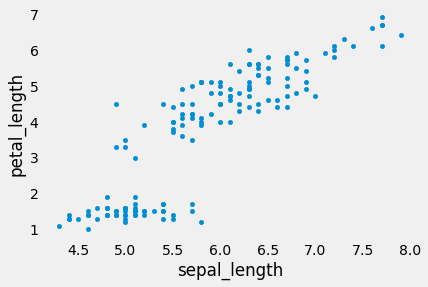

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore') 


temp_data.plot(kind ="scatter", 
          x ='sepal_length', 
          y ='petal_length') 

plt.grid() 



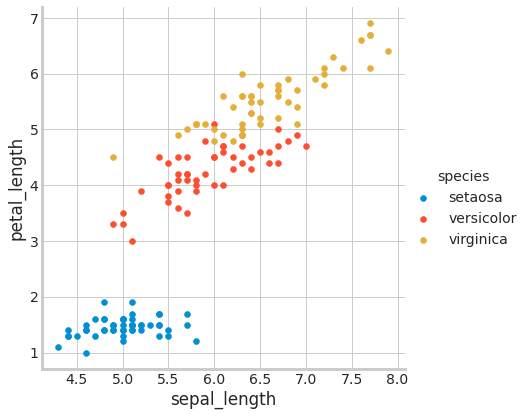

In [29]:
sns.set_style("whitegrid") 
  

  
sns.FacetGrid(temp_data, hue ="species",  
              height = 6).map(plt.scatter,  
                              'sepal_length',  
                              'petal_length').add_legend()

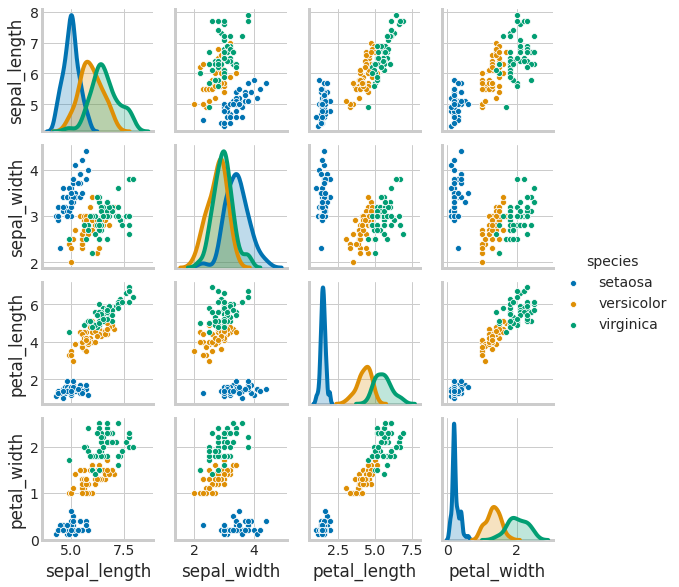

In [30]:
sns.pairplot(temp_data, hue="species", height = 2, palette = 'colorblind')

### (5)데이터셋 분리
학습용 데이터와 테스트용 데이터 분리

In [32]:
from sklearn.model_selection import train_test_split  
# 훈련 데이터와 텍스트 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(iris_data,  # 독립변수 
                                                    iris_label, # 종속변수 
                                                    test_size = 0.2, 
                                                    random_state = 1)

-array=

-test_size= 비율(훈련데이터/텍스트 데이터)

-random_state= 실험의 제한성을 위한 코드

### (6)머신러닝 모형 학습
 머신러닝 모형을 만듭시다

In [40]:
from sklearn.tree import DecisionTreeClassifier
# 객체 생성
df_clf=DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### (7) 모형 테스트
모형 예측

In [42]:
from sklearn.metrics import accuracy_score
pred = df_clf.predict(X_test)
print('The accuracy of the Decision Tree is: {:.3f}'.format(accuracy_score(pred,y_test)))

The accuracy of the Decision Tree is: 0.967


### (8)모형 결과 시각화
 모형 결과에 대해 혼동행렬로 시각화


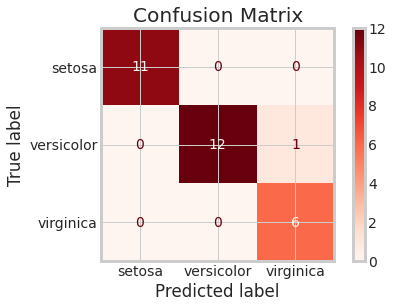

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(df_clf, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');